Tutorias Samsung
01-11-1025 Patricio Quishpe

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Resultados de clasificación (ventas altas/bajas):
                     Accuracy
KNN                  0.966667
Naive Bayes          0.933333
Logistic Regression  0.933333
Decision Tree        0.916667

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.86      0.95      0.90        19

    accuracy                           0.93        60
   macro avg       0.92      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60



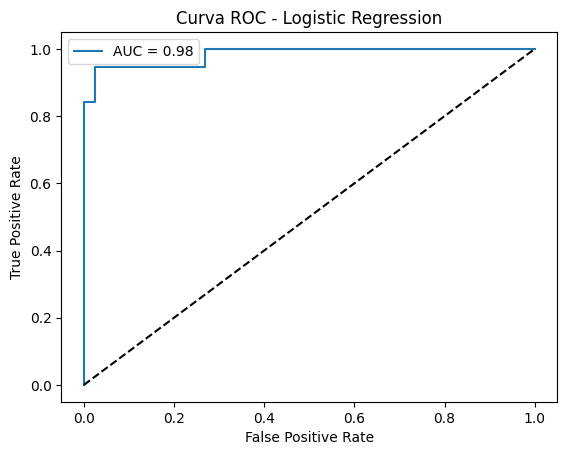

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Fijar semilla
seed = 42
np.random.seed(seed)

# Cargar datos
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

print(df.head())

# Variables predictoras y objetivo
X = df[['TV', 'radio', 'newspaper']]
# Convertir ventas a etiquetas binarias (1 = alta, 0 = baja)
umbral = df['sales'].median()
y = (df['sales'] > umbral).astype(int)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Escalado
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Función de evaluación
def evaluate_model(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    return accuracy_score(y_te, preds)

# Modelos
modelos = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(solver="liblinear", random_state=seed),
    "Decision Tree": DecisionTreeClassifier(random_state=seed)
}

resultados = {n: evaluate_model(m, X_train_s, X_test_s, y_train, y_test) for n, m in modelos.items()}

df_resultados = pd.DataFrame.from_dict(resultados, orient='index', columns=['Accuracy']).sort_values(by="Accuracy", ascending=False)
print("\nResultados de clasificación (ventas altas/bajas):")
print(df_resultados)

mejor = modelos["Logistic Regression"]
mejor.fit(X_train_s, y_train)
y_pred = mejor.predict(X_test_s)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


y_prob = mejor.predict_proba(X_test_s)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Logistic Regression")
plt.legend()
plt.show()
